In [27]:
import os
os.listdir("../data/raw/")


['data.csv', 'insurance.csv', 'Xente_Variable_Definitions.csv']

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# change the filename if needed
df = pd.read_csv("../data/raw/insurance.csv")

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df.shape


(1338, 7)

In [31]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [34]:
df.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
df.isna().mean() * 100


age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

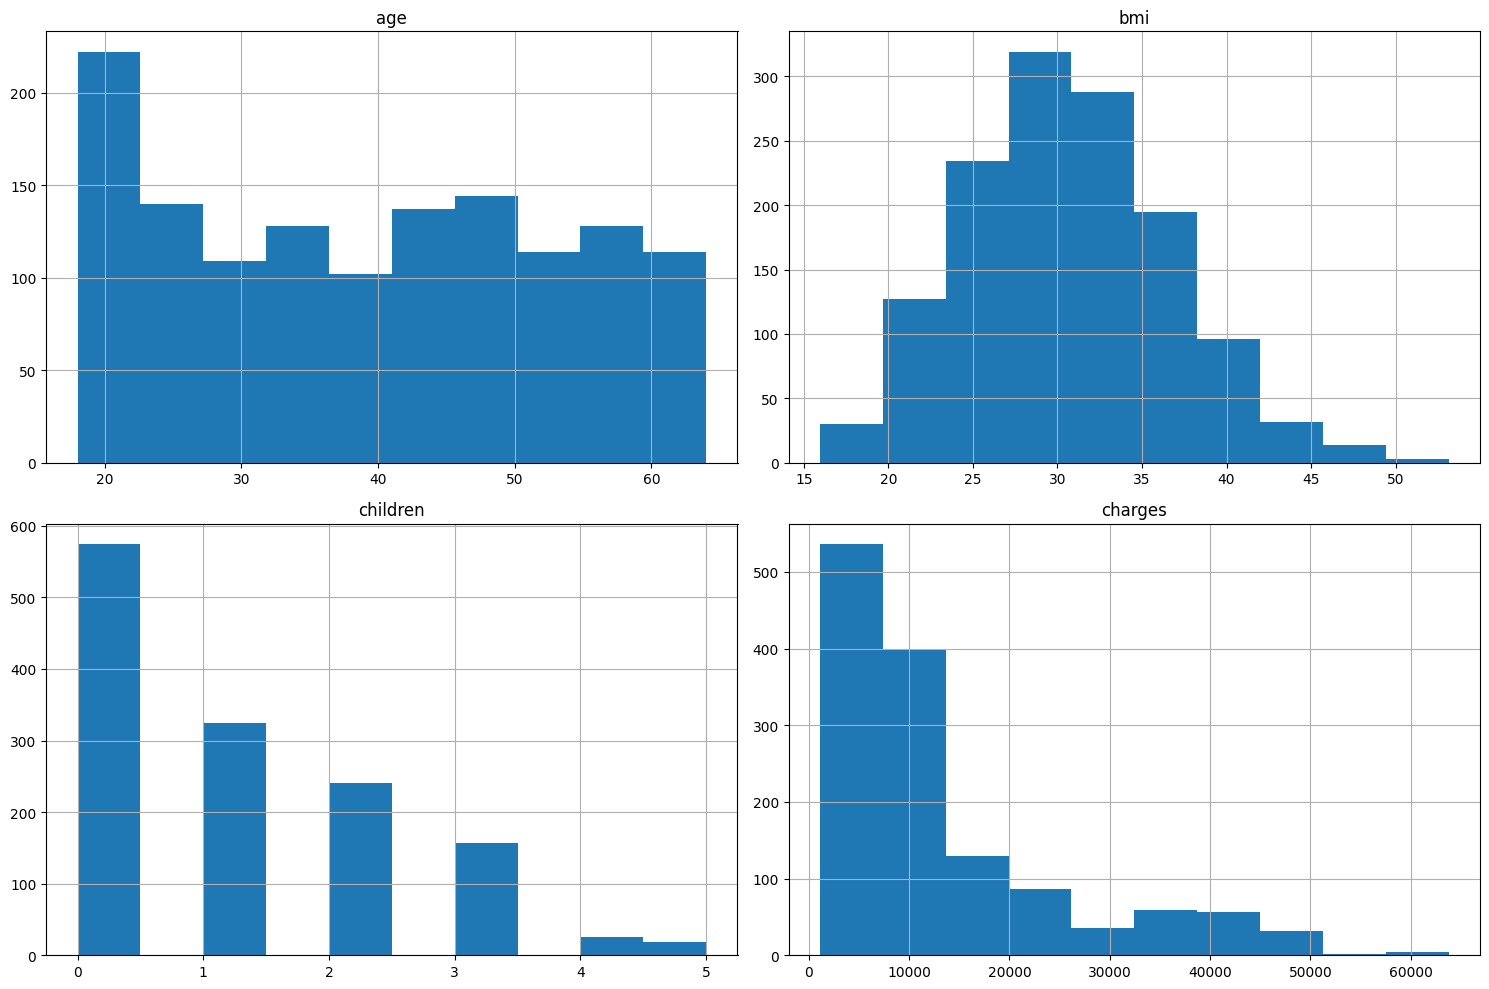

In [36]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[num_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()


In [37]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    print(df[col].value_counts())
    print("-" * 40)


sex
male      676
female    662
Name: count, dtype: int64
----------------------------------------
smoker
no     1064
yes     274
Name: count, dtype: int64
----------------------------------------
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
----------------------------------------


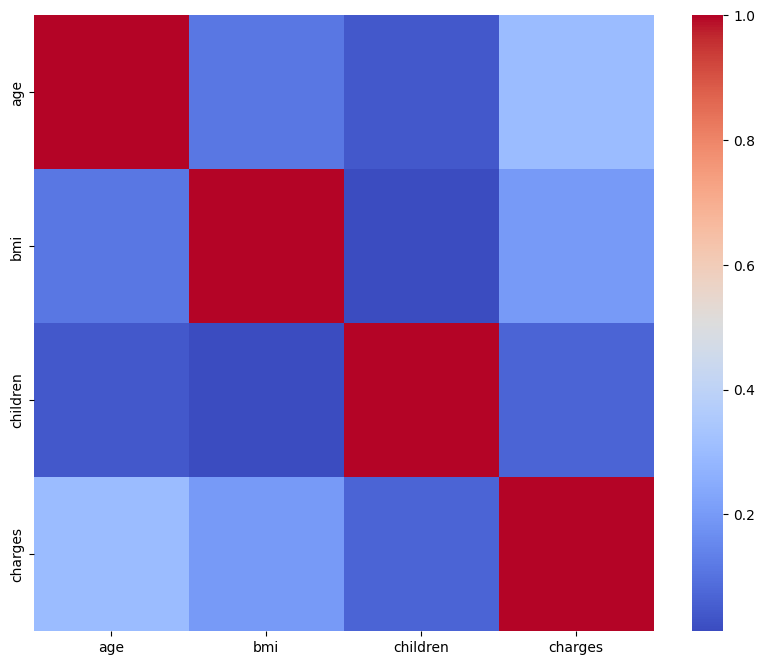

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm")
plt.show()


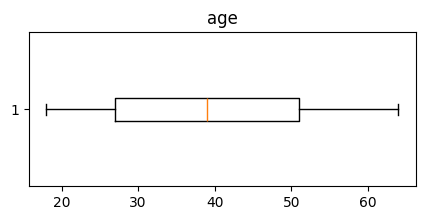

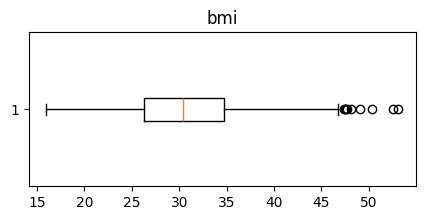

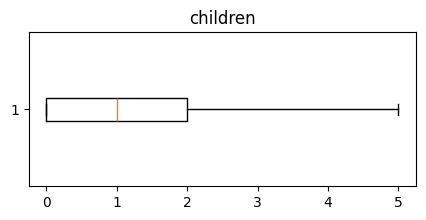

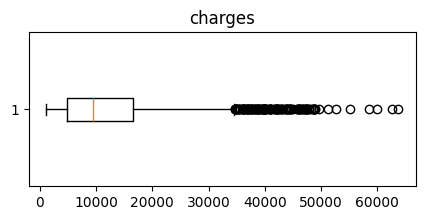

In [39]:
for col in num_cols:
    plt.figure(figsize=(5,2))
    plt.boxplot(df[col], vert=False)
    plt.title(col)
    plt.show()


## Key EDA Insights

1. The dataset contains both numerical and categorical features, indicating that different preprocessing techniques will be required for modeling.

2. Several numerical variables show skewed distributions with extreme values, which is common in insurance and financial data and may require transformation.

3. Some features contain missing values, suggesting that appropriate imputation strategies will be needed before model training.

4. Certain categorical variables are highly imbalanced, with a few dominant categories and several rare ones that may need grouping.

5. Outliers are present in multiple numerical features, but these likely represent real-world cases rather than data errors.
